In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

In [4]:
data = pd.read_csv('./Traffic_Accident_2017.csv',encoding='euc-kr')
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

### 요일별 사고 건수 시각화

In [6]:
# 요일별 사고 건수를 세봅시다.
temp = data['요일'].value_counts()
temp

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [7]:
#월~일 로 정렬
t = temp[['월','화','수','목','금','토','일']]
t

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

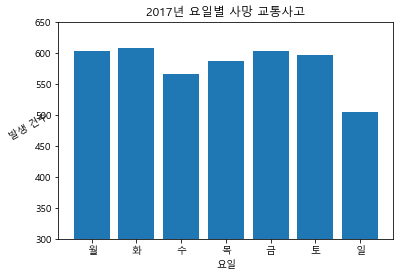

In [8]:
x = t.index
y = t.values
plt.bar(x,y)
plt.title('2017년 요일별 사망 교통사고')
plt.xlabel('요일')
plt.ylabel('발생 건수').set_rotation(30)
plt.ylim(300,650) 
plt.show()

### 차대 차 사건 중 죽거나 다친 사람이 많은 발생지 시,도를 알아보고 시각화해보자.

In [9]:
#'사고유형_대분류' 칼럼에서 '차대차'만 뽑아오기
car = data[data['사고유형_대분류']== '차대차']
car.head(2)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [10]:
# car에서 발생지시도를 기준으로 합계 구하기.
place = car[['사상자수','발생지시도']].groupby('발생지시도').sum()
place

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


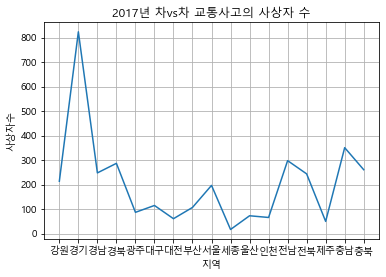

In [11]:
x= place.index
y= place.values
plt.plot(x,y)
plt.title('2017년 차vs차 교통사고의 사상자 수')
plt.xlabel('지역')
plt.ylabel('사상자수').set_rotation(90)
plt.grid()
plt.show()

### 파이 차트
 - 교통사고가 가장 많이 발생하는 시간대를 알아보기
 - 0~2,3~5,6~8,,,21~23 2시간씩 나눠서 알고싶다.
 - plt.pie()
 - autopct="%1.2f%%" : 1.(원하는 소수점자리숫자 1,2,,,)
 - counterclock=False :시계방향이 아닌 역시계방향으로 출력하고싶을때
 - .patch.set_facecolor("w") 배경색 변경

In [12]:
#시간만 가져오기
time = car['발생년월일시']
time%=100
time

0        1
2        2
8       18
9       20
17       9
        ..
4050     9
4055    23
4058    12
4060    18
4063    20
Name: 발생년월일시, Length: 1642, dtype: int64

In [13]:
bins = [-1,2,5,8,11,14,17,20,23] # 카테고리의 범위는 초과로 하나 적게 입력
labels = ["0~2","3~5","6~8","9~11","12~14","15~17","18~20","21~23"]
result = pd.cut(time,bins, labels=labels)
result

0         0~2
2         0~2
8       18~20
9       18~20
17       9~11
        ...  
4050     9~11
4055    21~23
4058    12~14
4060    18~20
4063    18~20
Name: 발생년월일시, Length: 1642, dtype: category
Categories (8, object): ['0~2' < '3~5' < '6~8' < '9~11' < '12~14' < '15~17' < '18~20' < '21~23']

In [14]:
rs = result.value_counts().sort_index()
rs

0~2      124
3~5      161
6~8      204
9~11     248
12~14    232
15~17    260
18~20    231
21~23    182
Name: 발생년월일시, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

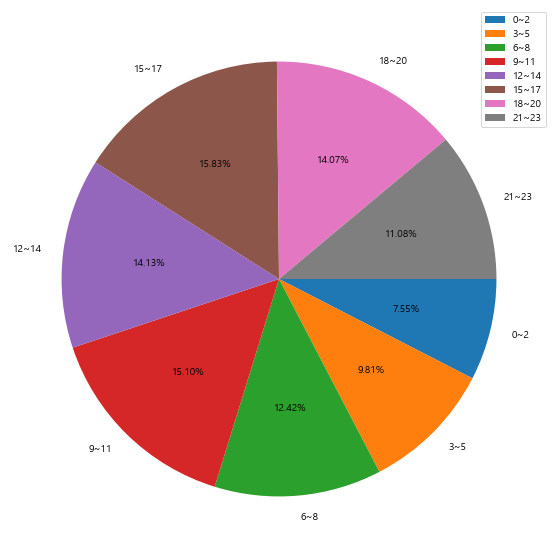

In [15]:
plt.figure(figsize=(10,10)).patch.set_facecolor("w")
plt.pie(rs,labels = labels,autopct="%1.2f%%",counterclock=False)
plt.legend(labels)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

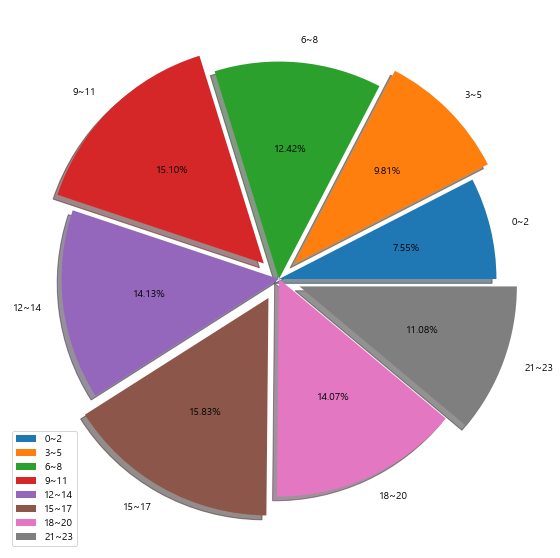

In [16]:
# 파이 조각 사이 간격 주기explode=변수이름
# 음영 : shadow = True
plt.figure(figsize=(10,10)).patch.set_facecolor("w")
explode=[0,0.10,0,0.10,0,0.10,0,0.10]
plt.pie(rs,labels = labels,autopct="%1.2f%%",explode=explode,shadow=True)
plt.legend(labels)
plt.show

### GDP 실습

<function matplotlib.pyplot.show(close=None, block=None)>

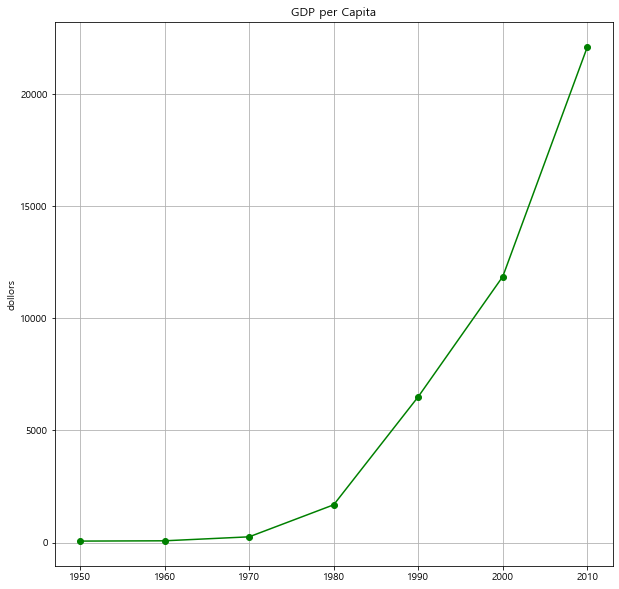

In [17]:
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [67.0,80.0,257.0,1686.0,6505,11865.3,22105.3]
plt.figure(figsize=(10,10)).patch.set_facecolor("w")
plt.plot(years,gdp,marker = 'o',c='g')
plt.title('GDP per Capita')
plt.ylabel('dollors')
plt.grid()
plt.savefig("gdp_per_capita.png",dpi=600)
plt.show

### 2차, 3차 방정식 그래프?

c:\Users\user\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


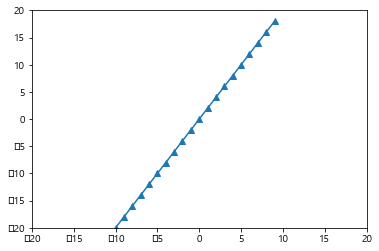

In [18]:
# y = 2x
x = [x for x in range(-10,10)]
y = [2*t for t in x]
plt.plot(x,y,marker='^')
plt.axis([-20,20,-20,20])
plt.show()

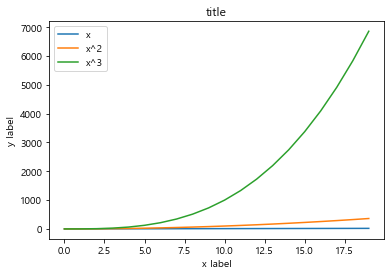

In [19]:
# y = 2x , z = 3x
x = [x for x in range(20)]
y = [x**2 for x in range(20)]
z = [x**3 for x in range(20)]
plt.plot(x,x, label = 'x')
plt.plot(x,y, label = 'x^2')
plt.plot(x,z, label = 'x^3')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('title')
plt.legend()
plt.show()

### 영어 점수 실습

In [20]:
sr= pd.Series([90,85,90,75,52,62,60,32,48,25])
sr.index=['철수','철수2','맹구','유리','수지','짱구','훈이','흰둥이','검둥이','누렁이']
sr

철수     90
철수2    85
맹구     90
유리     75
수지     52
짱구     62
훈이     60
흰둥이    32
검둥이    48
누렁이    25
dtype: int64

In [21]:
# 점수중 가장 높은것은?
sr.max()

90

In [22]:
# 점수가 가장 높은 학생은??
# .nlargest(1,keep='all')
sr.nlargest(1,keep='all').index

Index(['철수', '맹구'], dtype='object')

In [23]:
# 점수가 80 점 이상인 학생의 이름+ 점수
sr8 = sr[sr>=80]
sr8

철수     90
철수2    85
맹구     90
dtype: int64

In [24]:
# 점수가 50점이상, 80점 이하인 학생의 이름 + 점수
sr[(sr>=50)&(sr<=80)]

유리    75
수지    52
짱구    62
훈이    60
dtype: int64

In [25]:
# 영어점수 평균
sr.mean()

61.9

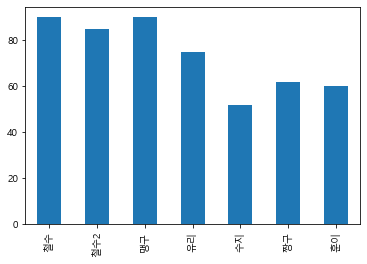

In [26]:
# 영어 점수가 50점 이상인 학생의 바 차트
sr50 = sr[sr>=50]
sr50.plot(kind='bar')
plt.show()

In [27]:
# 키보드로 학생들의 이름을 입력 받고, 그 학생의 영어 점수를 출력받아봅시다.
name = input('학생의 이름을 입력하세요: ')
if name in sr:
    print(sr[name])

32


In [28]:
name = input('학생의 이름을 입력하세요: ')
sr[name]

32

In [29]:
# 영어 점수 등급을 매겨봅시다.
# F : 0~59, D : 60~69, C: 70~79, B: 80~89, A:90~100 점

print('-'*20)
print('이름','점수','등급',sep='\t')
print('-'*20)
sr_cut=pd.cut(sr,[-1,59,69,79,89,100],labels=['F','D','C','B','A'])


--------------------
이름	점수	등급
--------------------


In [30]:
# 상위 퍼센트 점수 출력
sr.quantile([0.1,0.5,0.9])

0.1    31.3
0.5    61.0
0.9    90.0
dtype: float64

### 과일 데이터

In [31]:
fruit = pd.Series([10,20,30,50],index = ['딸기','귤','수박','사과'],name='과일')
fruit

딸기    10
귤     20
수박    30
사과    50
Name: 과일, dtype: int64

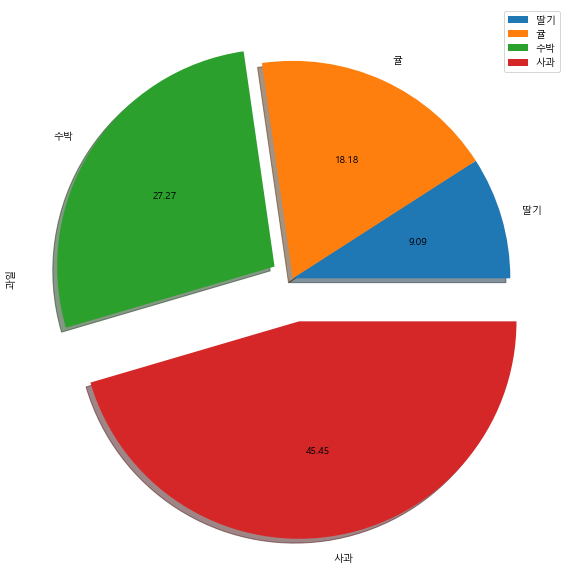

In [32]:
# 과일 비율을 파이차트로 그려보자

plt.figure(figsize=(10,10)).patch.set_facecolor("w")
fruit.plot(kind='pie',autopct='%.2f',shadow=True,explode=[0,0,0.1,0.2])
plt.legend()
plt.show()